In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

#list all files under the input directory to find the exact path of LifeExpectancy.csv
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/life-expectancy-based-on-geographic-locations/LifeExpectancy.csv


In [2]:
file_path = '/kaggle/input/life-expectancy-based-on-geographic-locations/LifeExpectancy.csv'

In [3]:
#load the CSV file into a pandas DataFrame
life_expectancy_df = pd.read_csv(file_path)

In [4]:
life_expectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
#summary statistics
print(life_expectancy_df.describe())

             Year  Life expectancy  Adult Mortality  infant deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000        69.224932       164.796448      30.407445   
std       4.61056         9.523867       124.292079     118.114450   
min    2000.00000        36.300000         1.000000       0.000000   
25%    2003.75000        63.100000        74.000000       0.000000   
50%    2007.50000        72.100000       144.000000       3.000000   
75%    2011.25000        75.700000       228.000000      22.000000   
max    2015.00000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2735.000000             2928.000000  2375.000000    2928.000000   
mean      4.614856              740.321185    80.960842    2427.855874   
std       4.050749             1990.930605    25.018337   11485.970937   
min       0.010000                0.000000     1.000000       0.000000   

In [6]:
unique_countries = life_expectancy_df['Country'].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel'

In [7]:
#replace infinite values with NaN
life_expectancy_df['Life expectancy'] = life_expectancy_df['Life expectancy'].replace([np.inf, -np.inf], np.nan)

In [8]:
#remove missing values
life_expectancy_df = life_expectancy_df.dropna()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


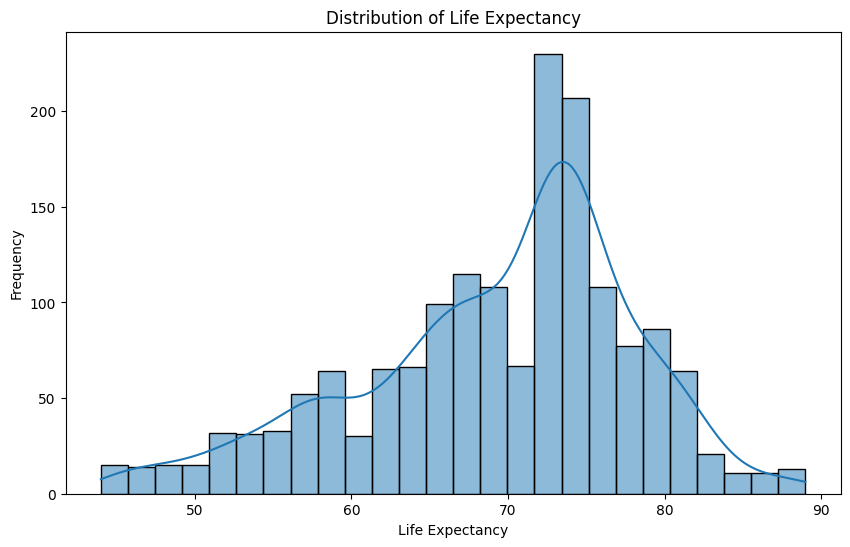

In [9]:
#life expectancy distribution
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy_df['Life expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


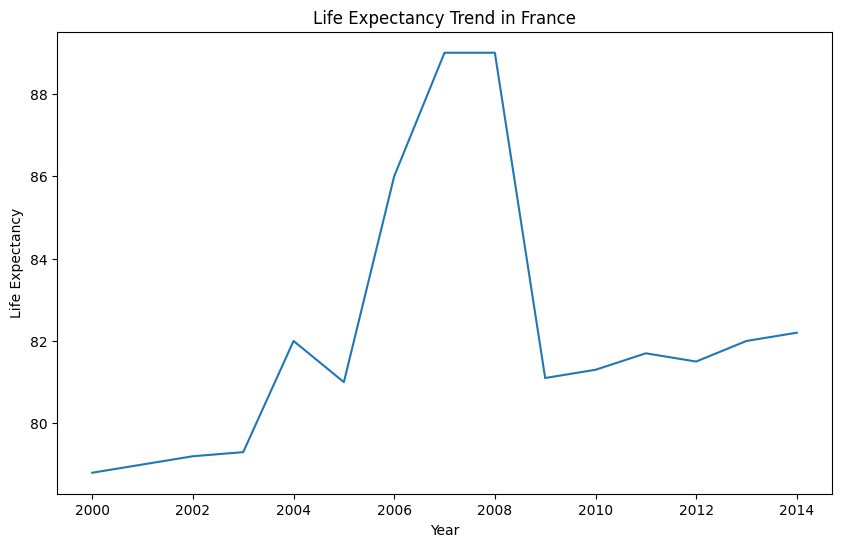

In [10]:
#life expectancy trend over time for a specific country
country_data = life_expectancy_df[life_expectancy_df['Country'] == 'France']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy', data=country_data)
plt.title('Life Expectancy Trend in France')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

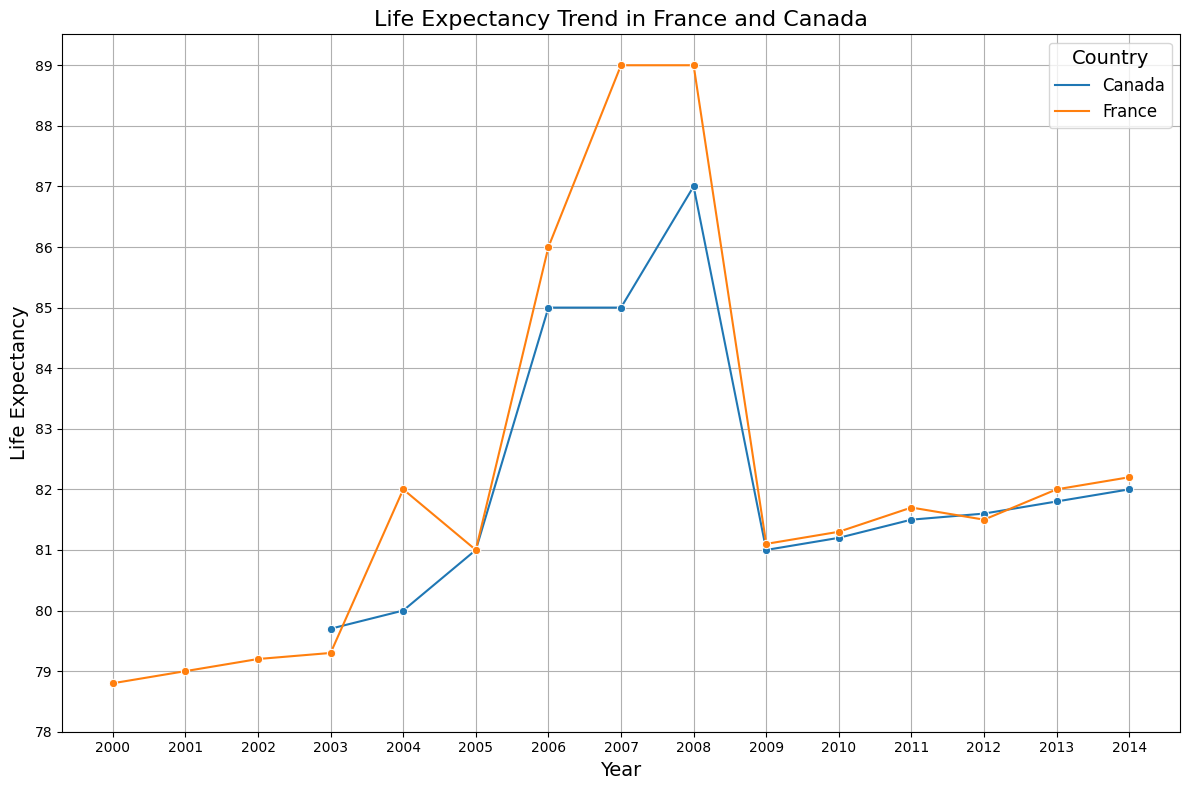

In [11]:
#life expectancy trend over time for multiple countries
countries = ['France', 'Canada']
country_data = life_expectancy_df[life_expectancy_df['Country'].isin(countries)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Life expectancy', hue='Country', data=country_data, marker='o')

plt.title('Life Expectancy Trend in France and Canada', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.legend(title='Country', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.xticks(np.arange(min(country_data['Year']), max(country_data['Year']) + 1, 1))
plt.yticks(np.arange(int(country_data['Life expectancy'].min()), int(country_data['Life expectancy'].max()) + 1, 1))
plt.tight_layout()
plt.show()

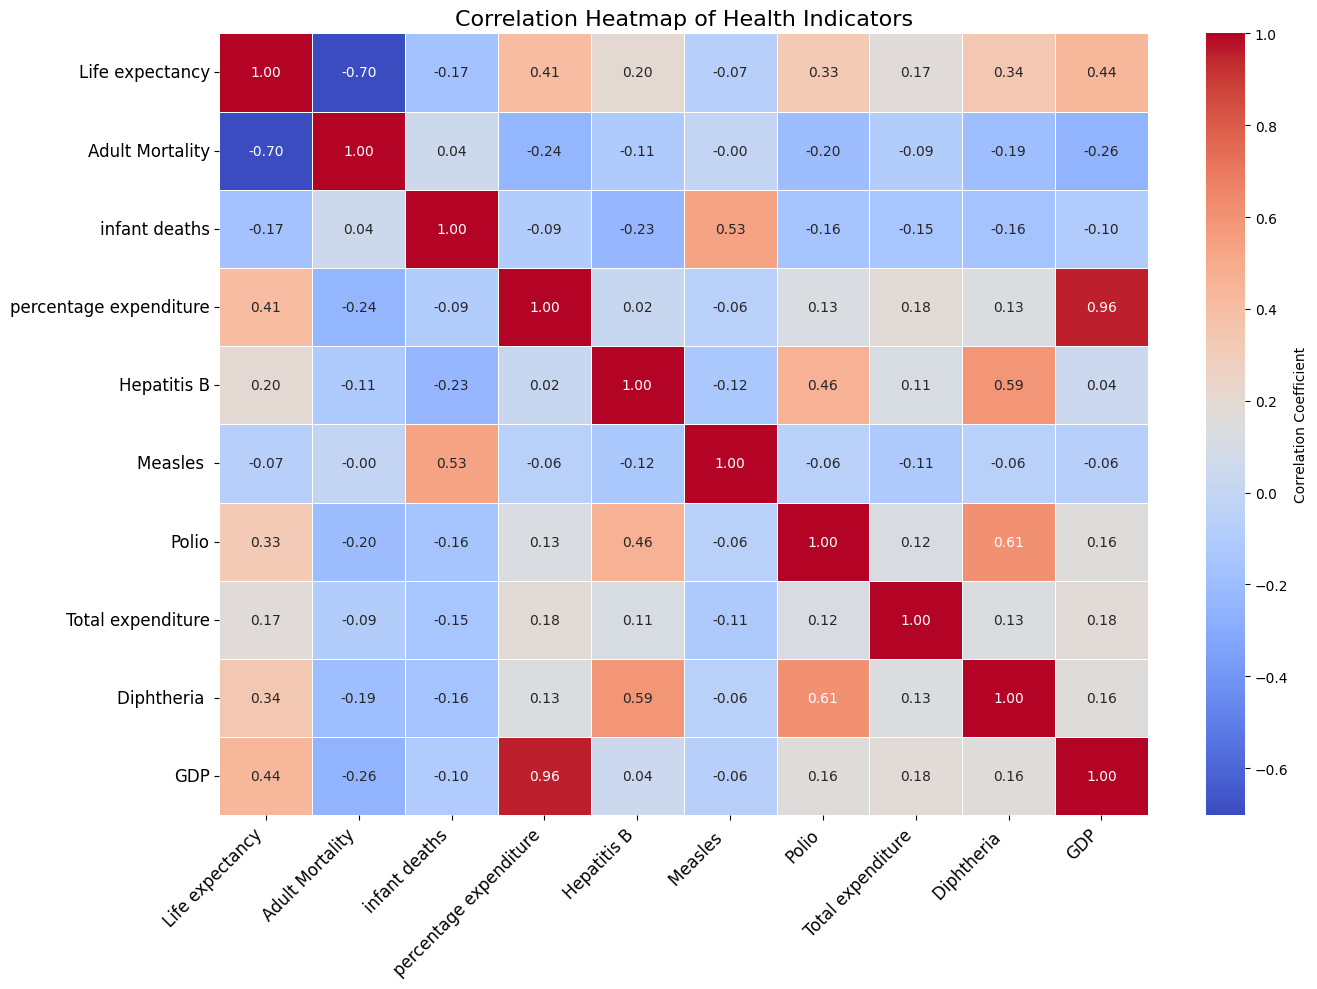

In [12]:
selected_columns = life_expectancy_df[['Life expectancy', 'Adult Mortality', 'infant deaths', 
                       'percentage expenditure', 'Hepatitis B', 'Measles ', 'Polio', 
                       'Total expenditure', 'Diphtheria ', 'GDP']]

#correlation matrix
correlation_matrix = selected_columns.corr()

#heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Health Indicators', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

ex. If Life expectancy and GDP have a high positive correlation (close to 1), it indicates that countries with higher GDP tend to have higher life expectancy.

ex. If Adult Mortality and Life expectancy have a strong negative correlation (close to -1), it suggests that higher adult mortality rates are associated with lower life expectancy.

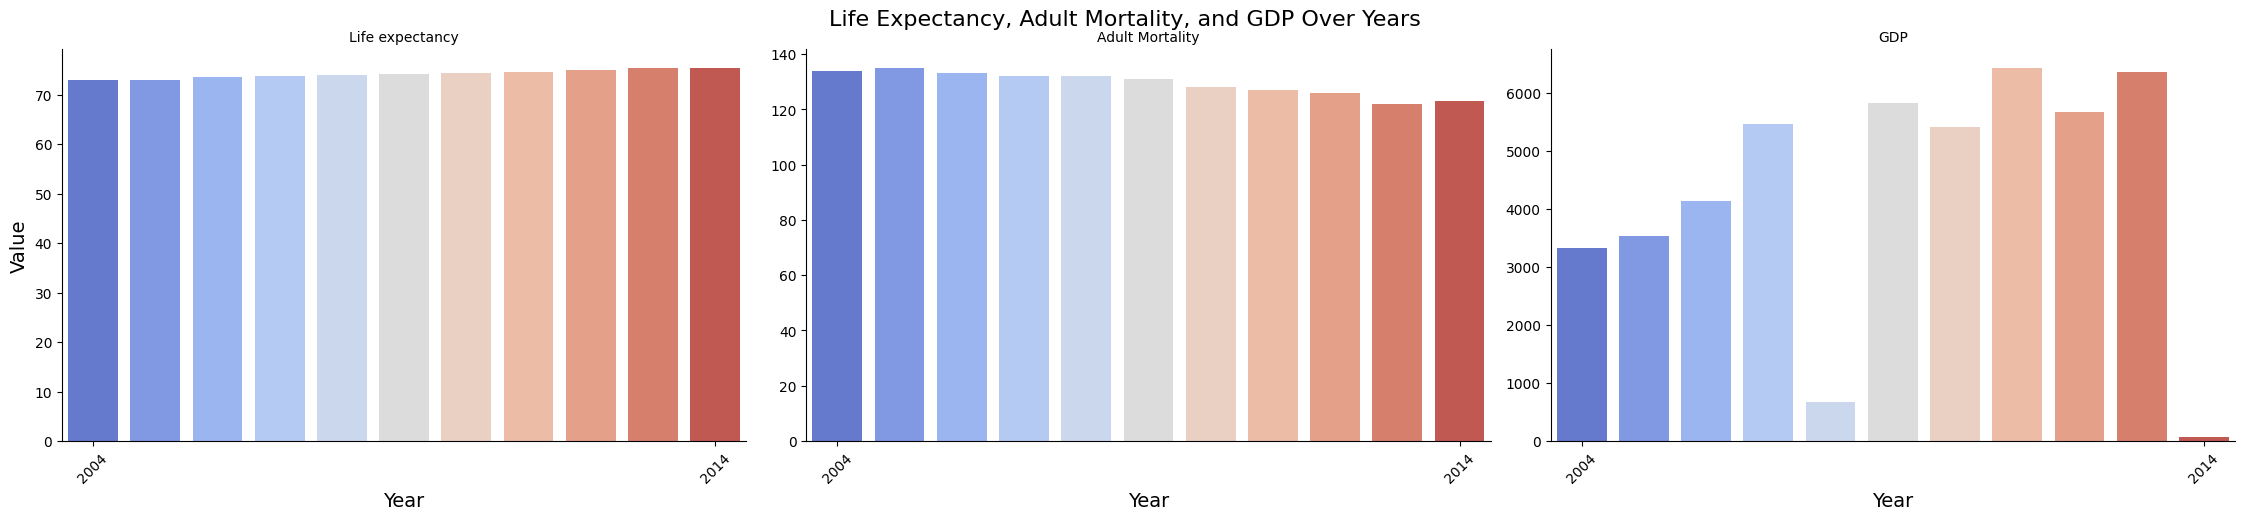

In [13]:
#select data for one country
one_c_df = life_expectancy_df[life_expectancy_df['Country'] == 'Serbia']

life_expectancy_df2 = one_c_df[['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'GDP']]

#melt the DataFrame to long format for FacetGrid
melted_df = life_expectancy_df2.melt(id_vars=['Country', 'Year', 'Status'], value_vars=['Life expectancy', 'Adult Mortality', 'GDP'],
                                    var_name='Indicator', value_name='Value')

#FacetGrid
g = sns.FacetGrid(melted_df, col="Indicator", col_wrap=3, sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, "Year", "Value", palette='coolwarm', errorbar=None, order=sorted(life_expectancy_df2['Year']))

g.set_titles("{col_name}", fontsize=16)
g.set_axis_labels("Year", "Value", fontsize=14)
g.fig.suptitle('Life Expectancy, Adult Mortality, and GDP Over Years', fontsize=16)
plt.subplots_adjust(top=0.9)

for ax in g.axes.flat:
    ax.set_xticks([0, len(life_expectancy_df2['Year']) - 1])  
    ax.set_xticklabels([life_expectancy_df2['Year'].min(), life_expectancy_df2['Year'].max()], rotation=45)

plt.show()

In [14]:
one_c_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2257,Serbia,2014,Developing,75.4,123,1,9.09,8.617208,92.0,37,...,93.0,1.37,93.0,0.1,62.173221,713576.0,2.1,2.1,0.771,14.3
2258,Serbia,2013,Developing,75.3,122,1,9.16,880.640337,91.0,1,...,97.0,1.12,95.0,0.1,6353.826383,7164132.0,2.1,2.1,0.766,14.1
2259,Serbia,2012,Developing,74.9,126,1,9.38,742.510971,97.0,0,...,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,2.1,0.767,14.0
2260,Serbia,2011,Developing,74.6,127,1,9.56,915.319079,94.0,370,...,94.0,9.72,94.0,0.1,6423.291783,723499.0,2.2,2.2,0.757,13.5
2261,Serbia,2010,Developing,74.4,128,1,9.65,774.439662,89.0,20,...,91.0,1.90,91.0,0.1,5411.877440,7291436.0,2.2,2.3,0.755,13.6
